<a href="https://colab.research.google.com/github/ikram2500/pytorch/blob/main/tabular_data_classification_pt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/mssmartypants/rice-type-classification?select=riceClassification.csv'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hmikram info
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 357MB/s]

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
data_df = pd.read_csv("/content/rice-type-classification/riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
data_df.dropna(inplace=True)

In [ ]:
data_df.drop(columns=["id"], inplace=True)

In [ ]:
data_df.shape

(18185, 11)

In [ ]:
data_df['Class'].value_counts()

,count
Class,
1,9985
0,8200


### 1. Normalization

In [ ]:
original_df = data_df.copy()

In [ ]:
for column in data_df.columns:
  data_df[column] = data_df[column] / data_df[column].abs().max()

In [ ]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


### 2. Split the data into X and y

In [ ]:
X = np.array(data_df.iloc[:, :-1])
Y = np.array(data_df.iloc[:, -1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


### 3. Convert the dataset into pytorch tensor

In [ ]:
class dataset(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype= torch.float32).to(device)
    self.Y = torch.tensor(Y, dtype= torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.Y[index]

In [ ]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=8, shuffle=True)
validation_dataloader = DataLoader(validation_data, batch_size=8, shuffle=True)
testing_dataloader = DataLoader(testing_data, batch_size=8, shuffle=True)

In [ ]:
for x, y in train_dataloader:
  print(x)
  print("=============")
  print(y)
  break

tensor([[0.8844, 0.9071, 0.8526, 0.9370, 0.8521, 0.9404, 0.8573, 0.7884, 0.7804,
         0.6036],
        [0.6872, 0.8551, 0.6996, 0.9615, 0.6544, 0.8290, 0.6188, 0.6936, 0.7833,
         0.6934],
        [0.6801, 0.8936, 0.6629, 0.9749, 0.6400, 0.8247, 0.9355, 0.7105, 0.7390,
         0.7648],
        [0.5837, 0.8505, 0.6050, 0.9798, 0.5573, 0.7640, 0.5163, 0.6761, 0.7002,
         0.7976],
        [0.5595, 0.8580, 0.5679, 0.9873, 0.5318, 0.7480, 0.8961, 0.6718, 0.6800,
         0.8572],
        [0.6106, 0.8591, 0.6233, 0.9775, 0.5842, 0.7814, 0.5843, 0.7010, 0.6813,
         0.7820],
        [0.6995, 0.8880, 0.6911, 0.9687, 0.6668, 0.8364, 0.6052, 0.7247, 0.7304,
         0.7290],
        [0.4661, 0.7378, 0.5531, 0.9736, 0.4444, 0.6827, 0.6790, 0.5953, 0.7213,
         0.7569]])
tensor([0., 0., 1., 1., 1., 1., 1., 1.])


In [ ]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
  def __init__(self):
      super(MyModel, self).__init__()
      self.input_layer = nn.Linear(X.shape[1],  HIDDEN_NEURONS)
      self.linear = nn.Linear(HIDDEN_NEURONS, 1)
      self.sigmoid = nn.Sigmoid()

  def forward(self, x):
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

model = MyModel().to(device)

In [ ]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [ ]:
total_loss_train_plot = []
total_loss_val_plot = []
total_acc_train_plot = []
total_acc_val_plot = []

epochs = 10
for epoch in range(epochs):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0

# this code is for to calculate a batch train and validation loss
  for data in train_dataloader:
    inputs , labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction, labels)

    total_loss_train += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()

    total_acc_train += acc


    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in validation_dataloader:
      inputs , labels = data

      prediction = model(inputs).squeeze(1)

      batch_loss = criterion(prediction, labels)

      total_loss_val += batch_loss.item()

      acc = ((prediction).round() == labels).sum().item()

      total_acc_val += acc

    total_loss_train_plot.append(round(total_loss_train / 1000, 4))
    total_loss_val_plot.append(round(total_loss_val / 1000, 4))

    total_acc_train_plot.append(round(total_acc_train / training_data.__len__() *100, 4))
    total_acc_val_plot.append(round(total_acc_val /validation_data.__len__() * 100, 4))

    print(f'''Epoch no. {epoch+1} Train loss: {round(total_loss_train / 1000, 4)} Train Accuracy {round(total_acc_train / training_data.__len__() *100, 4)}
          Validation Loss: {round(total_loss_val / 1000, 4)} Validation Accuracy {round(total_acc_val /validation_data.__len__() * 100, 4)}''')
    print("="*25)

Epoch no. 1 Train loss: 0.0707 Train Accuracy 98.5152
          Validation Loss: 0.0104 Validation Accuracy 98.937
Epoch no. 2 Train loss: 0.0708 Train Accuracy 98.4681
          Validation Loss: 0.0111 Validation Accuracy 98.827
Epoch no. 3 Train loss: 0.0706 Train Accuracy 98.5231
          Validation Loss: 0.011 Validation Accuracy 98.827
Epoch no. 4 Train loss: 0.0694 Train Accuracy 98.4838
          Validation Loss: 0.0104 Validation Accuracy 98.9003
Epoch no. 5 Train loss: 0.0705 Train Accuracy 98.5152
          Validation Loss: 0.0105 Validation Accuracy 98.937
Epoch no. 6 Train loss: 0.0702 Train Accuracy 98.4524
          Validation Loss: 0.0105 Validation Accuracy 98.937
Epoch no. 7 Train loss: 0.07 Train Accuracy 98.5073
          Validation Loss: 0.0103 Validation Accuracy 98.9736
Epoch no. 8 Train loss: 0.0699 Train Accuracy 98.5231
          Validation Loss: 0.0104 Validation Accuracy 98.937
Epoch no. 9 Train loss: 0.0703 Train Accuracy 98.5702
          Validation Loss: 

In [ ]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in testing_dataloader:
    inputs, labels = data
    prediction = model(inputs).squeeze(1)
    batch_loss = criterion(prediction, labels)
    total_loss_test += batch_loss.item()
    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc

  print(f'''Test loss: {round(total_loss_test / 1000, 4)} Test Accuracy {round(total_acc_test /testing_data.__len__() *100, 4)}''')


Test loss: 0.0134 Test Accuracy 98.717


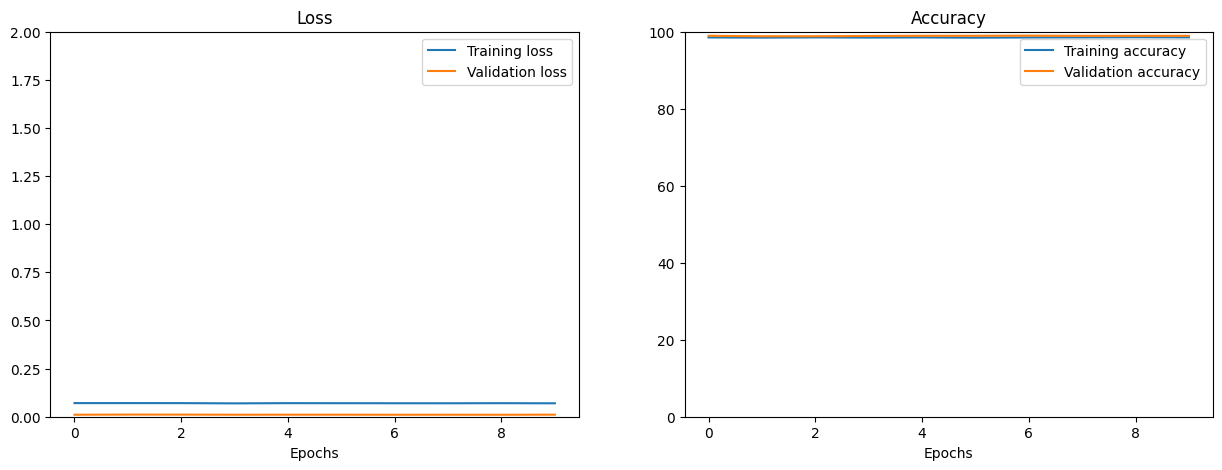

In [ ]:
fig , axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(total_loss_train_plot, label = 'Training loss')
axs[0].plot(total_loss_val_plot, label = 'Validation loss')
axs[0].set_xlabel('Epochs')
axs[0].set_title('Loss')
axs[0].set_ylim([0, 2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label = 'Training accuracy')
axs[1].plot(total_acc_val_plot, label = 'Validation accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_title('Accuracy')
axs[1].set_ylim([0, 100])
axs[1].legend()

plt.show()

In [ ]:
original_df.columns


Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [ ]:
Area = 2353/original_df['Area'].abs().max()
MajorAxisLength = 81/original_df['MajorAxisLength'].abs().max()
MinorAxisLength = 42/original_df['MinorAxisLength'].abs().max()
Eccentricity = 32/original_df['Eccentricity'].abs().max()
ConvexArea = 12/original_df['ConvexArea'].abs().max()
EquivDiameter = 33/original_df['EquivDiameter'].abs().max()
Extent = 98/original_df['Extent'].abs().max()
Perimeter = 927/original_df['Perimeter'].abs().max()
Roundness = 677/original_df['Roundness'].abs().max()
AspectRation = 24/original_df['AspectRation'].abs().max()
my_prediction = model(torch.tensor([[Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation]], dtype= torch.float32).to(device))
round(my_prediction.item())

0

In [ ]:
round(my_prediction.item())

0